In [70]:
import pandas as pd
import json
import ast
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from joblib import dump, load
import os
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.svm import SVC
import pickle as pkl
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import roc_curve, auc
import warnings




class append:
    def __init__(self,df2):

        self.df = df2 

    def name(self, data):

        t1 = ''
        for i in range(0,8):
            t1 += data[i]
        parts2 = t1.str.split(':')
        t2 = parts2.str[6]
        parts3 = t2.str.split('\'')
        name = parts3.str[1]
        return name
    

    def designation(self, data):

        specific = 'name_limited'
        contains_string = self.parts1.apply(lambda x: specific in x[4] if len(x) > 4 else False)

        if contains_string.any():
            name_limited = data[4]
            designation = data[5]
            nasa_jpl_url = data[6]
            abs_magnitude_h = data[7]
            diameter = ' '
            for i in range(8,16):
                diameter += data[i] + ','
            hazard = data[16]
        else:
            name_limited = ' '
            designation = data[4]
            nasa_jpl_url = data[5]
            abs_magnitude_h = data[6]
            diameter = ' '
            for i in range(7,15):
                diameter += data[i] + ','
            hazard = data[15]


        return name_limited, designation, nasa_jpl_url, abs_magnitude_h, diameter, hazard
    
    def orbit(self, data):

        orbit = ' '
        orbit = data[1]
        parts = orbit.str.split(',')
        orbit_data1 = ' '
        for i in range(1,26):
            orbit_data1 += parts.str[i].astype(str) + ','
        orbit_data1 = orbit_data1.str.rstrip(',')
        parts2 = orbit_data1.str.split(':')
        orbit_data = ' '
        for i in range(1,30):
            orbit_data += parts2.str[i].astype(str) + ':'
        orbit_data = orbit_data.str.rstrip(':')
        #orbit_data = orbit_data.apply(ast.literal_eval)

        is_sentry_object1 = ' '
        is_sentry_object1 = parts.str[26]
        parts1 = is_sentry_object1.str.split(':')
        is_sentry_object = parts1.str[1].astype(str)
        is_sentry_object = is_sentry_object.str.rstrip('}')
        is_sentry_object = is_sentry_object.str.lower() == 'true'
        is_sentry_object = is_sentry_object.astype(bool)

        return orbit_data, is_sentry_object

    def separation(self):
    

        # Assuming df2 is already defined
        df_result = pd.DataFrame()  # Initialize an empty DataFrame to store results

        for i in range(len(self.df)):
            df2t = self.df.iloc[[i]]  # Process each row
            df2t = pd.DataFrame(df2t)
            df2t['data'] = df2t['neo_data']
            df2t = df2t.drop(columns=['neo_data'])
            df2t = df2t.astype(str)

            parts = df2t['data'].str.split(' ')
            parts1 = df2t['data'].str.split(',')
            partsorbit = df2t['data'].str.split(']')
            self.parts1 = parts1
            name_limited, designation, nasa_jpl_url, abs_magnitude_h, diameter, hazard = self.designation(parts1.str)
            orbit_data, is_sentry_object = self.orbit(partsorbit.str)
            
            df2t['links'] = parts.str[1] + parts.str[2]
            df2t['id'] = parts.str[4]
            df2t['id'] = df2t['id'].str.replace('\'', '')
            df2t['id'] = df2t['id'].str.replace(',', '')
            df2t['id'] = df2t['id'].astype(int)


            df2t['neo_reference_id'] = parts.str[6]
            df2t['neo_reference_id'] = df2t['neo_reference_id'].str.replace('\'', '')
            df2t['neo_reference_id'] = df2t['neo_reference_id'].str.replace(',', '')
            df2t['neo_reference_id'] = df2t['neo_reference_id'].astype(int)


            df2t['name'] = self.name(parts1.str)


            df2t['name_limited'] = name_limited
            parts = df2t['name_limited'].str.split(' ')
            df2t['name_limited'] = parts.str[2]
            df2t['name_limited'] = df2t['name_limited'].astype(str)
            df2t['name_limited'] = df2t['name_limited'].str.replace('\'', '')


            df2t['designation'] = designation
            parts = df2t['designation'].str.split(' ')
            df2t['designation'] = parts.str[2]
            df2t['designation'] = df2t['designation'].astype(str)
            df2t['designation'] = df2t['designation'].str.replace('\'', '')


            df2t['nasa_jpl_url'] = nasa_jpl_url
            parts = df2t['nasa_jpl_url'].str.split(' ')
            df2t['nasa_jpl_url'] = parts.str[2]
            df2t['nasa_jpl_url'] = df2t['nasa_jpl_url'].astype(str)
            df2t['nasa_jpl_url'] = df2t['nasa_jpl_url'].str.replace('\'', '')


            df2t['absolute_magnitude_h'] = abs_magnitude_h
            parts = df2t['absolute_magnitude_h'].str.split(' ')
            df2t['absolute_magnitude_h'] = parts.str[2]
            df2t['absolute_magnitude_h'] = df2t['absolute_magnitude_h'].astype(str)
            df2t['absolute_magnitude_h'] = df2t['absolute_magnitude_h'].str.replace('\'', '')
            df2t['absolute_magnitude_h'] = df2t['absolute_magnitude_h'].astype(float)


            df2t['estiated_diameter1'] = diameter
            df2t['estiated_diameter1'] = df2t['estiated_diameter1'].str.rstrip(',')
            parts = df2t['estiated_diameter1'].str.split(' ')

            df2t['estimated_diameter'] = ' '
            for i in range(3,23):
                df2t['estimated_diameter'] += parts.str[i] + ' '
            df2t.drop(columns=['estiated_diameter1'], inplace=True)


            df2t['is_potentially_hazardous_asteroid'] = hazard
            parts = df2t['is_potentially_hazardous_asteroid'].str.split(' ')
            df2t['is_potentially_hazardous_asteroid'] = parts.str[2]
            df2t['is_potentially_hazardous_asteroid'] = df2t['is_potentially_hazardous_asteroid'].astype(str)
            df2t['is_potentially_hazardous_asteroid'] = df2t['is_potentially_hazardous_asteroid'].str.lower() == 'true'
            df2t['is_potentially_hazardous_asteroid'] = df2t['is_potentially_hazardous_asteroid'].astype(bool)

            parts1 = df2t['data'].str.split('[')
            df2t['approachdata'] = ' '
            df2t['approachdata'] = parts1.str[1]
            parts2 = df2t['approachdata'].str.split(']')
            df2t['close_approach_data'] = ' '
            df2t['close_approach_data'] = parts2.str[0]
            df2t['close_approach_data'] = df2t['close_approach_data'].apply(lambda x: f'[{x}]')
            df2t['close_approach_data'] = df2t['close_approach_data'].apply(ast.literal_eval)
            # df2t['close_approach_data'] = df2t['close_approach_data'].apply(lambda x: ' ' if x == [] else x)
            df2t = df2t[df2t['close_approach_data'].apply(lambda x: x != [])]

            df2t.drop(columns=['approachdata'], inplace=True)


            # df2t['close_approach_data'] = df2t['close_approach_data'].apply(ast.literal_eval)



            df2t['orbital_data'] = orbit_data


            df2t['is_sentry_object'] = is_sentry_object
            
                        


            df_result = pd.concat([df_result, df2t], ignore_index=True)  # Append to the result DataFrame

        df_result = df_result.drop(columns=['data'])
        df_result.dropna(subset=['close_approach_data'], inplace=True)
        self.df_result = df_result

        return self.df_result
    
    def concat(self):

        df_result = self.separation()

        df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/neo_data.csv')

        df = pd.concat([df, df_result], ignore_index=True)

        return df
    
class OverallProcessor:

    def __init__(self, df):
        self.df = df

    def explode(self):

        def explode_approach(self):
            self.df['close_approach_data'] = self.df['close_approach_data'].apply(ast.literal_eval)
            self.df = self.df.explode("close_approach_data").reset_index(drop=True)
            normalized_close_approach_data = pd.json_normalize(self.df['close_approach_data'])
            self.df = pd.concat([self.df.drop(columns=['close_approach_data']), normalized_close_approach_data], axis=1)
            
        
        def clean_diameter(self):
                self.df.drop(columns=['neo_reference_id', 'name_limited', 'links', 'nasa_jpl_url'], inplace=True)
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('\'', '')
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('{', '')
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('}', '')
                parts = self.df['estimated_diameter'].str.split(',')
                self.df['estimated_diameter'] = parts.str[0] + parts.str[1]
                parts = self.df['estimated_diameter'].str.split(':')
                self.df['estimated_diameter'] = parts.str[1] + parts.str[2] + parts.str[3] 
                parts = self.df['estimated_diameter'].str.split(' ')
                self.df['estimated_diameter_min'] = parts.str[2]
                self.df['estimated_diameter_max'] = parts.str[4]
                self.df.drop(columns=['estimated_diameter'], inplace=True)


        def clean_orbits(self):
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('\'', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('{', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('}', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace(']', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('[', '')
            parts = self.df['orbital_data'].str.split(',')
            self.df['extracted_orbital_data'] = parts.str[7]+parts.str[10]+parts.str[12]+parts.str[15]+parts.str[17]
            parts = self.df['extracted_orbital_data'].str.split(' ')
            self.df['minimum_orbit_intersection'] = parts.str[2]
            self.df['eccentricity'] = parts.str[4]
            self.df['inclination'] = parts.str[6]
            self.df['perihilion_distance'] = parts.str[8]
            self.df['aphelion_distance'] = parts.str[10]
            self.df.drop(columns=['orbital_data', 'extracted_orbital_data'], inplace=True)    

        explode_approach(self)
        clean_diameter(self)
        clean_orbits(self)
        return self.df
    
    def clean(self):

        def explode_approach(self):
            self.df['close_approach_data'] = self.df['close_approach_data'].apply(ast.literal_eval)
            self.df = self.df.explode("close_approach_data").reset_index(drop=True)
            normalized_close_approach_data = pd.json_normalize(self.df['close_approach_data'])
            self.df = pd.concat([self.df.drop(columns=['close_approach_data']), normalized_close_approach_data], axis=1)
            
        
        def clean_diameter(self):
                self.df.drop(columns=['neo_reference_id', 'name_limited', 'links', 'nasa_jpl_url'], inplace=True)
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('\'', '')
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('{', '')
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('}', '')
                parts = self.df['estimated_diameter'].str.split(',')
                self.df['estimated_diameter'] = parts.str[0] + parts.str[1]
                parts = self.df['estimated_diameter'].str.split(':')
                self.df['estimated_diameter'] = parts.str[1] + parts.str[2] + parts.str[3] 
                parts = self.df['estimated_diameter'].str.split(' ')
                self.df['estimated_diameter_min'] = parts.str[2].astype(float)
                self.df['estimated_diameter_max'] = parts.str[4].astype(float)
                self.df.drop(columns=['estimated_diameter'], inplace=True)


        def clean_orbits(self):
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('\'', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('{', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('}', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace(']', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('[', '')
            parts = self.df['orbital_data'].str.split(',')
            self.df['extracted_orbital_data'] = parts.str[7]+parts.str[10]+parts.str[12]+parts.str[15]+parts.str[17]
            parts = self.df['extracted_orbital_data'].str.split(' ')
            self.df['minimum_orbit_intersection'] = parts.str[2].astype(float)
            self.df['eccentricity'] = parts.str[4].astype(float)
            self.df['inclination'] = parts.str[6].astype(float)
            self.df['perihilion_distance'] = parts.str[8].astype(float)
            self.df['aphelion_distance'] = parts.str[10].astype(float)
            self.df.drop(columns=['orbital_data', 'extracted_orbital_data'], inplace=True)   


        def clean_df(self):
            self.df.drop(columns=['id', 'name', 'designation', 'is_sentry_object', 'close_approach_date', 'close_approach_date_full', 'epoch_date_close_approach', 'orbiting_body', 'relative_velocity.kilometers_per_second', 'relative_velocity.miles_per_hour', 'miss_distance.astronomical', 'miss_distance.lunar', 'miss_distance.miles' ], inplace=True)
            self.df = self.df.rename(columns={'is_potentially_hazardous_asteroid': 'is_hazardous'}) 
            estimated_diameter_average = (self.df['estimated_diameter_min'].astype(float) + self.df['estimated_diameter_max'].astype(float)) / 2
            self.df['estimated_diameter_average'] = estimated_diameter_average

        def encoder(self):
            le = LabelEncoder()
            self.df['is_hazardous'] = le.fit_transform(self.df['is_hazardous'])

        explode_approach(self)
        clean_diameter(self)
        clean_orbits(self)
        clean_df(self)
        encoder(self)
        return self.df  
    
    def clean2(self):

        def explode_approach(self):
            self.df['close_approach_data'] = self.df['close_approach_data'].apply(ast.literal_eval)
            self.df = self.df.explode("close_approach_data").reset_index(drop=True)
            normalized_close_approach_data = pd.json_normalize(self.df['close_approach_data'])
            self.df = pd.concat([self.df.drop(columns=['close_approach_data']), normalized_close_approach_data], axis=1)
            
        
        def clean_diameter(self):
                self.df.drop(columns=['neo_reference_id', 'name_limited', 'links', 'nasa_jpl_url'], inplace=True)
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('\'', '')
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('{', '')
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('}', '')
                parts = self.df['estimated_diameter'].str.split(',')
                self.df['estimated_diameter'] = parts.str[0] + parts.str[1]
                parts = self.df['estimated_diameter'].str.split(':')
                self.df['estimated_diameter'] = parts.str[1] + parts.str[2] + parts.str[3] 
                parts = self.df['estimated_diameter'].str.split(' ')
                self.df['estimated_diameter_min'] = parts.str[2].astype(float)
                self.df['estimated_diameter_max'] = parts.str[4].astype(float)
                self.df.drop(columns=['estimated_diameter'], inplace=True)


        def clean_orbits(self):
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('\'', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('{', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('}', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('[', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace(']', '')
            parts = self.df['orbital_data'].str.split(',')
            self.df['extracted_orbital_data'] = parts.str[6:9].astype(str).str.cat(parts.str[10:20].astype(str), sep='')
            self.df['extracted_orbital_data'] = self.df['extracted_orbital_data'].str.replace('\'', '')
            self.df['extracted_orbital_data'] = self.df['extracted_orbital_data'].str.replace('{', '')
            self.df['extracted_orbital_data'] = self.df['extracted_orbital_data'].str.replace('}', '')
            self.df['extracted_orbital_data'] = self.df['extracted_orbital_data'].str.replace('[', '')
            self.df['extracted_orbital_data'] = self.df['extracted_orbital_data'].str.replace(']', '')
            self.df['extracted_orbital_data'] = self.df['extracted_orbital_data'].str.replace(',', '')
            parts2 = self.df['extracted_orbital_data'].str.split(' ')
            self.df['orbit_uncertainty'] = parts2.str[2].astype(float)
            self.df['minimum_orbit_intersection'] = parts2.str[5].astype(float)
            self.df['jupiter_tisserand_invariant'] = parts2.str[8].astype(float)
            self.df['eccentricity'] = parts2.str[10].astype(float)
            self.df['semi_major_axis'] = parts2.str[13].astype(float)
            self.df['inclination'] = parts2.str[16].astype(float)
            self.df['ascending_node_longitude'] = parts2.str[19].astype(float)
            # df2t['orbital_period'] = parts2.str[22]
            self.df['perihelion_distance'] = parts2.str[25].astype(float)
            self.df['perihelion_argument'] = parts2.str[28].astype(float)
            self.df['aphelion_distance'] = parts2.str[31].astype(float)
            self.df['perihelion_time'] = parts2.str[34].astype(float)
            self.df['mean_anomaly'] = parts2.str[37].astype(float)
            self.df.drop(['orbital_data', 'extracted_orbital_data'], axis=1, inplace=True)


        def clean_df(self):
            self.df.drop(columns=['id', 'name', 'designation', 'is_sentry_object', 'close_approach_date', 'close_approach_date_full', 'epoch_date_close_approach', 'orbiting_body', 'relative_velocity.kilometers_per_second', 'relative_velocity.miles_per_hour', 'miss_distance.astronomical', 'miss_distance.lunar', 'miss_distance.miles' ], inplace=True)
            self.df = self.df.rename(columns={'is_potentially_hazardous_asteroid': 'is_hazardous'}) 
            estimated_diameter_average = (self.df['estimated_diameter_min'].astype(float) + self.df['estimated_diameter_max'].astype(float)) / 2
            self.df['estimated_diameter_average'] = estimated_diameter_average

        def encoder(self):
            le = LabelEncoder()
            self.df['is_hazardous'] = le.fit_transform(self.df['is_hazardous'])

        explode_approach(self)
        clean_diameter(self)
        clean_orbits(self)
        clean_df(self)
        encoder(self)
        return self.df  
    
    
    def smote(self):
             
        self.df_test = self.df.copy()

        sm = SMOTE(sampling_strategy='minority', random_state=42)
        oversampled_X, oversampled_Y = sm.fit_resample(self.df_test.drop('is_hazardous', axis=1), self.df_test['is_hazardous'])
        self.df = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
        return self.df
    
    def adasyn(self):
        self.df_test = self.df.copy()

        ada = ADASYN(sampling_strategy='minority', random_state=42)
        oversampled_X, oversampled_Y = ada.fit_resample(self.df_test.drop('is_hazardous', axis=1), self.df_test['is_hazardous'])
        self.df = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
        return self.df
        
    def rus(self):
        self.df_test = self.df.copy()

        X = self.df_test.drop(columns=['is_hazardous'])
        y = self.df_test['is_hazardous']

        rus = RandomUnderSampler(random_state=42)
        X_resampled, y_resampled = rus.fit_resample(X,y)
        self.df = pd.concat([pd.DataFrame(y_resampled), pd.DataFrame(X_resampled)], axis=1)
        self.df.reset_index(drop=True, inplace=True)
        return self.df
    

class scalesplit:
    def __init__(self, df):
        self.df = df

    def ssplit(self):

        def split(self):

         X = self.df.drop(columns=['is_hazardous'])
         y = self.df['is_hazardous']


         split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

         for train_index, test_index in split.split(X, y):
          self.X_train, self.X_test = X.loc[train_index], X.loc[test_index]
          self.y_train, self.y_test = y.loc[train_index], y.loc[test_index]

         

        def scale(self):
         
            self.X_train = StandardScaler().fit_transform(self.X_train)
            self.X_test = StandardScaler().fit_transform(self.X_test)

    
        split(self)
        scale(self)

        X_train = self.X_train
        X_test = self.X_test
        y_train = self.y_train
        y_test = self.y_test

        return X_train, X_test, y_train, y_test
    
    def ttsplit(self):

        def scale(self):

            X = self.df.drop(columns=['is_hazardous'])

            X_scale = StandardScaler().fit_transform(X)

            return X_scale
        
        def split(self):

            X = scale(self)
            y = y = self.df['is_hazardous']

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            return X_train, X_test, y_train, y_test
                
        X_train, X_test, y_train, y_test = split(self)

        return X_train, X_test, y_train, y_test

class LogRegression:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def fit(self):

            def gridsearch():
#                 logReg = LogisticRegression()

#                 param_grid = {'solver': ['liblinear', 'newton-cholesky'],
#               'penalty':['none', 'l2'],
#               'C':[0.001, 0.01, 0.1, 1, 10, 100],
#               'n_jobs': [8],
#               'random_state': [0, 42, 32],
#               'fit_intercept': [True, False],
#               'warm_start': [True, False]
# }


#                 grid_search = GridSearchCV(logReg, param_grid, cv=5, verbose=0, n_jobs=-1)
#                 grid_search.fit(self.X_train, self.y_train)


                # self.best_estimator_ = LogisticRegression(C=0.001, fit_intercept=False, n_jobs=8, random_state=0,solver='liblinear', warm_start=True) 
                self.best_estimator_ = LogisticRegression(C=0.001, fit_intercept=False, n_jobs=8, random_state=0,solver='newton-cholesky', warm_start=True)

                # print(f'Best parameters: {grid_search.best_params_}')
                # print(f'Best Score: {grid_search.best_score_}')
                # print(f'Best Estimator: {grid_search.best_estimator_} ')

            def Regression(self):

                warnings.filterwarnings("ignore", message=".*'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'.*")

                k = 5 
                kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

                best_model = self.best_estimator_
                best_model.fit(self.X_train, self.y_train)

                prediction = best_model.predict(self.X_test)

                accuracy = accuracy_score(self.y_test, prediction)
                recall = recall_score(prediction, self.y_test)
                f1 = f1_score(prediction, self.y_test)
                roc = roc_auc_score(self.y_test, prediction)

                print (f'The accuracy score is {accuracy}\n The recall score is {recall}\n The f1 score is {f1}\n The roc score is {roc}\n')

                print(f'Classification Report: \n {classification_report(self.y_test, prediction)}\n')

                r2 =  cross_val_score(best_model,self.X_train,self.y_train,cv=kf,scoring='r2')
                print(f'Cross validation score: {r2}\n')

                np.mean(r2)

                print(f'Mean cross validation score: {np.mean(r2)}\n')

                cm = confusion_matrix(self.y_test, prediction)
                disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                disp.plot(cmap='Blues')
                plt.show()

                cm2 = cm / cm.sum(axis=1)[:, np.newaxis]

                sns.heatmap(cm2, annot=True, cmap='Blues')

                
            gridsearch()
            Regression(self)

class supportvm:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test


    def gridsearch(self):

        svm = SVC(random_state=42)


        param_grid = {
            'kernel' : ['linear', 'rbf'],
            'C' : [1000, 1500, 2000],
            'gamma' : ['scale', 'auto']
        }


        grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, verbose=2)
        print(grid_search)


        grid_search.fit(self.X_train, self.y_train)

        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best score: {grid_search.best_score_}")
        print(f"Best estimator: {grid_search.best_estimator_}\n")

        grid_search.best_estimator_svm = grid_search.best_estimator_

        return grid_search.best_estimator_svm

    def fit(self):

        bestsvm = self.gridsearch()

        k = 5 
        kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

        # svm = SVC(C=10000, random_state=42, kernel='rbf', gamma='scale')
        svm = bestsvm
        svm.fit(self.X_train, self.y_train)

        prediction = svm.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, prediction)
        recall = recall_score(prediction, self.y_test)
        f1 = f1_score(prediction, self.y_test)
        roc = roc_auc_score(self.y_test, prediction)

        print (f'The accuracy score is {accuracy}\n The recall score is {recall}\n The f1 score is {f1}\n The roc score is {roc}\n')

        print(f'Classification Report: \n {classification_report(self.y_test, prediction)}\n')

        r2 =  cross_val_score(svm,self.X_train,self.y_train,cv=kf,scoring='r2')
        print(f'Cross validation score: {r2}\n')

        np.mean(r2)

        print(f'Mean cross validation score: {np.mean(r2)}\n')

        cm = confusion_matrix(self.y_test, prediction)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.show()

        cm2 = cm / cm.sum(axis=1)[:, np.newaxis]

        sns.heatmap(cm2, annot=True, cmap='Blues')

class supportvm2:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def fit(self):

        # bestsvm = SVC(C=10000, random_state=42)
        bestsvm = SVC(C=2000, gamma='auto', random_state=42)

        k = 5 
        kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

        # svm = SVC(C=10000, random_state=42, kernel='rbf', gamma='scale')
        svm = bestsvm
        svm.fit(self.X_train, self.y_train)

        prediction = svm.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, prediction)
        recall = recall_score(prediction, self.y_test)
        f1 = f1_score(prediction, self.y_test)
        roc = roc_auc_score(self.y_test, prediction)

        print (f'The accuracy score is {accuracy}\n The recall score is {recall}\n The f1 score is {f1}\n The roc score is {roc}\n')

        print(f'Classification Report: \n {classification_report(self.y_test, prediction)}\n')

        r2 =  cross_val_score(svm,self.X_train,self.y_train,cv=kf,scoring='r2')
        print(f'Cross validation score: {r2}\n')

        np.mean(r2)

        print(f'Mean cross validation score: {np.mean(r2)}\n')

        cm = confusion_matrix(self.y_test, prediction)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.show()

        cm2 = cm / cm.sum(axis=1)[:, np.newaxis]

        sns.heatmap(cm2, annot=True, cmap='Blues')

class RandomForest:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def fit(self):

        warnings.filterwarnings("ignore", message=".*class_weight presets 'balanced' or 'balanced_subsample' are not recommended for warm_start if the fitted data differs from the full dataset.*", module="sklearn.ensemble._forest")


        k = 5 
        kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

        self.randomforest = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=42, warm_start=True)
        self.randomforest.fit(self.X_train, self.y_train)

        prediction = self.randomforest.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, prediction)
        recall = recall_score(prediction, self.y_test)
        f1 = f1_score(prediction, self.y_test)
        roc = roc_auc_score(self.y_test, prediction)

        print (f'The accuracy score is {accuracy}\n The recall score is {recall}\n The f1 score is {f1}\n The roc score is {roc}\n')

        print(f'Classification Report: \n {classification_report(self.y_test, prediction)}\n')


        r2 =  cross_val_score(self.randomforest,self.X_train,self.y_train,cv=kf,scoring='r2')
        print(f'Cross validation score: {r2}\n')

        np.mean(r2)

        print(f'Mean cross validation score: {np.mean(r2)}\n')

        cm = confusion_matrix(self.y_test, prediction)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.show()

        cm2 = cm / cm.sum(axis=1)[:, np.newaxis]

        sns.heatmap(cm2, annot=True, cmap='Blues')

    def predict(self, df):

        X_test = df

        prediction = self.randomforest.predict(X_test)

        print(f'The prediction is {prediction}')


In [113]:
df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/CSV/neo_data_copy.csv') 
df = OverallProcessor(df).clean()
# df.drop(columns=['estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'], inplace=True)
df = OverallProcessor(df).rus()
df.head()

,is_hazardous,absolute_magnitude_h,relative_velocity.kilometers_per_hour,miss_distance.kilometers,estimated_diameter_min,estimated_diameter_max,minimum_orbit_intersection,eccentricity,inclination,perihilion_distance,aphelion_distance,estimated_diameter_average
0,0,26.91,28183.2262176706,1338996.724016161,0.011029,0.024663,0.010087,0.509392,6.686945,1.006954,3.097967,0.017846
1,0,25.82,32738.0262647721,22194554.396867284,0.018220,0.040742,0.001913,0.447136,2.255558,0.799494,2.092696,0.029481
2,0,28.44,28749.3011604989,15141658.306645302,0.005452,0.012191,0.006157,0.150310,7.286439,0.895825,1.212767,0.008822
3,0,23.26,23279.7304638839,65208239.205723247,0.059232,0.132446,0.187817,0.105311,5.624949,1.194911,1.476209,0.095839
4,0,23.14,81474.3102856586,63946287.135052165,0.062597,0.139972,0.083318,0.607917,8.093767,1.014742,4.161424,0.101284


In [114]:
df_target = df['is_hazardous']
df_target_array = df_target.values
df_features = df.drop(columns=['is_hazardous'])
df_features_array = df_features.values

# preprocess = ColumnTransformer([
#     ('scaler', StandardScaler(), ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance'])
# ])
preprocess = ColumnTransformer([
    ('scaler', StandardScaler(), ['absolute_magnitude_h', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers','minimum_orbit_intersection', 'eccentricity', 'inclination', 'perihilion_distance', 'aphelion_distance', 'estimated_diameter_average'])
])

# preprocess = ColumnTransformer([
#     ('scaler', StandardScaler(), ['absolute_magnitude_h', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers', 'orbit_uncertainty', 'minimum_orbit_intersection','jupiter_tisserand_invariant', 'eccentricity', 'semi_major_axis', 'inclination', 'ascending_node_longitude', 'perihelion_distance', 'perihelion_argument', 'aphelion_distance', 'perihelion_time', 'mean_anomaly'])
# ])

# preprocess = ColumnTransformer([
#     ('scaler', StandardScaler(), ['absolute_magnitude_h', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers', 'orbit_uncertainty', 'minimum_orbit_intersection','jupiter_tisserand_invariant', 'eccentricity', 'semi_major_axis', 'inclination', 'ascending_node_longitude', 'perihelion_distance', 'perihelion_argument', 'aphelion_distance', 'perihelion_time', 'mean_anomaly', 'estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'])
# ])



pipeline = Pipeline([
    ('preprocess', preprocess)])

df_preprocessed = pipeline.fit_transform(df)
df_preprocessed

X_train, X_test, y_train, y_test = train_test_split(df_preprocessed, df_target_array, test_size=0.2)

sss = StratifiedShuffleSplit(n_splits=1, test_size=5000, random_state=42)

for train_index, sample_index in sss.split(X_train, y_train):
    X_train_sample = X_train[sample_index]
    y_train_sample = y_train[sample_index]

In [115]:
X_train_sample.shape

(5000, 11)

The accuracy score is 0.901792828685259
 The recall score is 0.8864073931459376
 The f1 score is 0.9032764371198745
 The roc score is 0.9018682539682539

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      2520
           1       0.89      0.92      0.90      2500

    accuracy                           0.90      5020
   macro avg       0.90      0.90      0.90      5020
weighted avg       0.90      0.90      0.90      5020


Cross validation score: [0.604      0.528      0.504      0.55599822 0.51199805]

Mean cross validation score: 0.5407992543970176



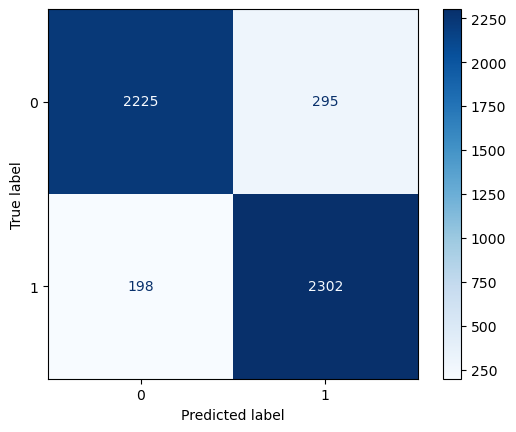

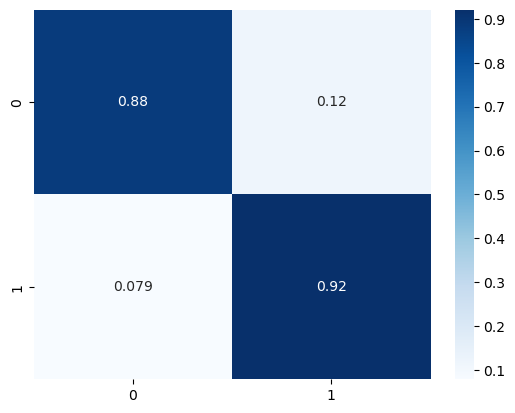

In [116]:
log_reg = LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.9918326693227092
 The recall score is 0.9880905121079794
 The f1 score is 0.9918310420402471
 The roc score is 0.9918476190476191

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2520
           1       0.99      1.00      0.99      2500

    accuracy                           0.99      5020
   macro avg       0.99      0.99      0.99      5020
weighted avg       0.99      0.99      0.99      5020


Cross validation score: [0.976      0.984      0.964      0.96799987 0.97999992]

Mean cross validation score: 0.9743999583998336



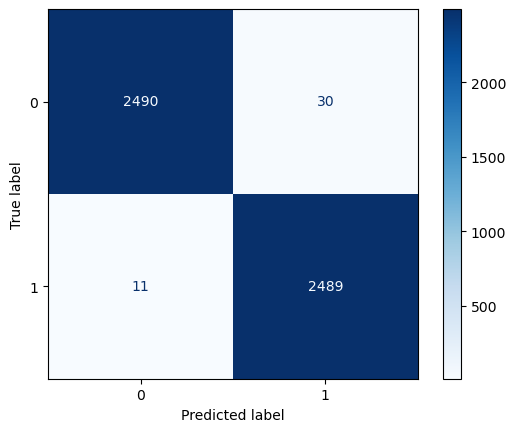

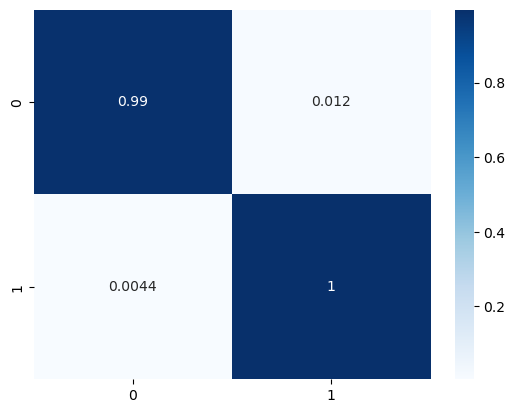

In [117]:
suportvm = supportvm2(X_train_sample, X_test, y_train_sample, y_test)
suportvm.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The roc score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2520
           1       1.00      1.00      1.00      2500

    accuracy                           1.00      5020
   macro avg       1.00      1.00      1.00      5020
weighted avg       1.00      1.00      1.00      5020




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights

Cross validation score: [1. 1. 1. 1. 1.]

Mean cross validation score: 1.0



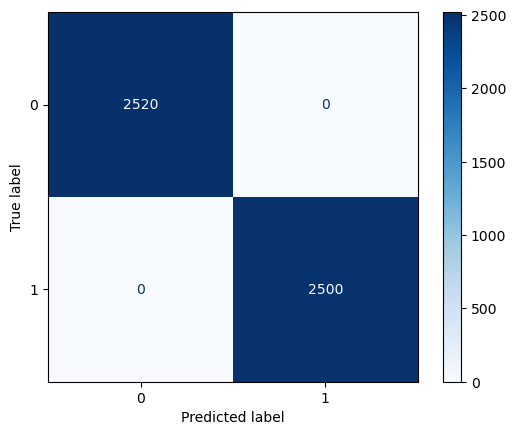

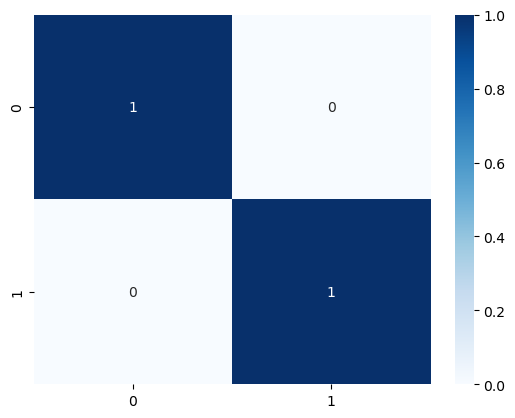

In [118]:
ranfr = RandomForest(X_train_sample, X_test, y_train_sample, y_test)
ranfr.fit()

In [124]:
pdpred = df.iloc[[16405, 568, 7369, 876, 13372]]

# pdpred = pd.DataFrame([pdpred])
pdpred

,is_hazardous,absolute_magnitude_h,relative_velocity.kilometers_per_hour,miss_distance.kilometers,estimated_diameter_min,estimated_diameter_max,minimum_orbit_intersection,eccentricity,inclination,perihilion_distance,aphelion_distance,estimated_diameter_average
16405,1,14.42,119120.9971591433,9037389.297549068,3.471802,7.763186,0.017551,0.859046,17.515692,0.310170,4.090842,5.617494
568,0,14.42,68772.1011937175,46630925.327168228,3.471802,7.763186,0.309044,0.238415,38.454083,1.299639,2.113347,5.617494
7369,0,14.57,68732.1199968221,15881811.899732146,3.240074,7.245027,0.093126,0.653346,24.462789,0.835580,3.985253,5.242550
876,0,14.34,7758.8737843324,67172111.767850598,3.602093,8.054526,0.213116,0.454652,3.848788,1.197102,3.193128,5.828310
13372,1,14.40,148953.264107049,6310169.712966878,3.503926,7.835018,0.018690,0.889806,22.311174,0.140109,2.402836,5.669472


In [125]:
pdpred.drop(columns=['is_hazardous'], inplace=True)
pdpred

# # 15 columns
# preprocess = ColumnTransformer([
#     ('scaler', StandardScaler(), ['absolute_magnitude_h', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers', 'orbit_uncertainty', 'minimum_orbit_intersection','jupiter_tisserand_invariant', 'eccentricity', 'semi_major_axis', 'inclination', 'ascending_node_longitude', 'perihelion_distance', 'perihelion_argument', 'aphelion_distance', 'perihelion_time', 'mean_anomaly'])
# ])


# 18 Columns
# preprocess = ColumnTransformer([
#     ('scaler', StandardScaler(), ['absolute_magnitude_h', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers', 'orbit_uncertainty', 'minimum_orbit_intersection','jupiter_tisserand_invariant', 'eccentricity', 'semi_major_axis', 'inclination', 'ascending_node_longitude', 'perihelion_distance', 'perihelion_argument', 'aphelion_distance', 'perihelion_time', 'mean_anomaly', 'estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'])
# ])


# 11 Columns
preprocess = ColumnTransformer([
    ('scaler', StandardScaler(), ['absolute_magnitude_h', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers','minimum_orbit_intersection', 'eccentricity', 'inclination', 'perihilion_distance', 'aphelion_distance', 'estimated_diameter_average'])
])


pipeline = Pipeline([
    ('preprocess', preprocess)])

df_preprocessed = pipeline.fit_transform(pdpred)
df_preprocessed

/var/folders/bs/2tfzn10x6jl89d57bc7g9kph0000gn/T/ipykernel_23989/1187897853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdpred.drop(columns=['is_hazardous'], inplace=True)


array([[-0.13176157,  0.1165411 ,  0.1165411 ,  0.75290084, -0.83591762,
        -0.98620192,  0.97331196, -0.34036482, -0.96283241,  1.16405065,
         0.1165411 ],
       [-0.13176157,  0.1165411 ,  0.1165411 , -0.28699105,  0.73776929,
         1.56333013, -1.543709  ,  1.53369308,  1.17157583, -1.30114628,
         0.1165411 ],
       [ 1.84466197, -1.83158118, -1.83158118, -0.28781681, -0.54940618,
        -0.32518553,  0.13907931,  0.28142416,  0.17054204,  1.03242074,
        -1.83158118],
       [-1.18585412,  1.21189173,  1.21189173, -1.54714103,  1.5976351 ,
         0.72429965, -0.66674291, -1.56359967,  0.95039027,  0.04493685,
         1.21189173],
       [-0.39528471,  0.38660725,  0.38660725,  1.36904806, -0.95008059,
        -0.97624232,  1.09806065,  0.08884726, -1.32967574, -0.94026195,
         0.38660725]])

In [126]:
ranfr.predict(df_preprocessed)

The prediction is [1 0 0 0 1]
